<a href="https://colab.research.google.com/github/chrrtonch/compas_extra_data/blob/main/Kopie_von_Prediction_of_Recidivism_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [ ]:
#Checking for distribution of labels in the dataset --> Is the target variable balanced? Do we need to stratify our train/test split? 

df_final['two_year_recid'].value_counts()

In [ ]:
#Plot distribution of features

# General Data Preprocessing

In [ ]:
# Import libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data into dataframe
# get data from github (Propublica)
df = pd.read_csv('/content/drive/MyDrive/compas-scores-two-years.csv')
# get extra-data from clemens-github

In [ ]:
# Exploring the data

In [ ]:
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [ ]:
df.isna().sum()

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_o

In [ ]:
# Imputing all NaN values with 0

df.fillna(0)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,0,1.0,F,Aggravated Assault w/Firearm,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,0,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),0.0,2013-07-05,Felony Battery (Dom Strang),0,0,0.0,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,0,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,0.0,0,0,0,0,0,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,0.0,0,0,13000570CF10A,2013-01-12,0,1.0,F,Possession of Cannabis,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,0,0,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,0.0,0,0,12014130CF10A,0,2013-01-09,76.0,F,arrest case no charge,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,0,0,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,0,7,0,0,0,-1.0,2013-11-22 05:18:27,2013-11-24 02:59:20,13016249CF10A,2013-11-22,0,1.0,F,Deliver Cannabis,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,Risk of Recidivism,7,Medium,2013-11-23,Risk of Violence,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,0,3,0,0,0,-1.0,2014-01-31 07:13:54,2014-02-02 04:03:52,14001422CF10A,2014-01-31,0,1.0,F,Leaving the Scene of Accident,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,Risk of Recidivism,3,Low,2014-02-01,Risk of Violence,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,0,1,0,0,0,-1.0,2014-01-13 05:48:01,2014-01-14 07:49:46,14000581CF10A,2014-01-13,0,1.0,F,Aggravated Battery / Pregnant,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,Risk of Recidivism,1,Low,2014-01-14,Risk of Violence,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,0,2,0,0,3,-1.0,2014-03-08 08:06:02,2014-03-09 12:18:04,14003308CF10A,2014-03-08,0,1.0,M,Battery on Law Enforc Officer,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,Risk of Recidivism,2,Low,2014-03-09,Risk of Violence,2,Low,2014-03-09,2014-

In [ ]:
# Creating new variable "prison_stay"

df['c_jail_out'] = pd.to_datetime(df['c_jail_out'])
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])

df["prison_stay"] = (df["c_jail_out"] - df["c_jail_in"]).dt.days

In [ ]:
# Encoding of ordinal categorical variables

size_mapping = {"Less than 25": 1, "25 - 45": 2, "Greater than 45": 3}

df["age_cat"] = df["age_cat"].map(size_mapping)

In [ ]:
# Encoding of nominal categorical variables

df = pd.get_dummies(df, columns = ["c_charge_degree","race","sex"],drop_first=True)

In [ ]:
# Drop non-relevant columns

df_final = (df
  .drop(columns=["id", "name", "first", "last", "compas_screening_date", "dob", "days_b_screening_arrest", "c_jail_in", "c_jail_out", "event", "is_recid", 
                 "is_violent_recid", "score_text", "screening_date", "v_type_of_assessment", "v_decile_score", "v_score_text", "v_screening_date", 
                 "priors_count.1", "decile_score.1", "start", "end", "type_of_assessment", "age"])
  .dropna(axis=1, how="any")
)

In [ ]:
df_final.head()

,age_cat,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,two_year_recid,c_charge_degree_M,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,sex_Male
0,3,0,1,0,0,0,0,0,0,0,0,0,1,1
1,2,0,3,0,0,0,1,0,0,0,0,0,0,1
2,1,0,4,0,1,4,1,0,0,0,0,0,0,1
3,1,0,8,1,0,1,0,0,0,0,0,0,0,1
4,2,0,1,0,0,2,0,0,0,0,0,0,1,1


# General Data Preprocessing 2

In [1]:
#Import libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
url1 = 'https://raw.githubusercontent.com/chrrtonch/compas_extra_data/main/extra_info.csv'
url2 = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv'
url3 = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years-violent.csv'
extra_data = pd.read_csv(url1, header=0)
two_years = pd.read_csv(url2, header=0)
two_years_v = pd.read_csv(url3, header=0)
id = two_years_v['id']
two_years_v = two_years_v.drop(columns=two_years.columns)
two_years_v['id'] = id

In [19]:
df = pd.merge(left=two_years,right=two_years_v,how='left',on='id')
df = pd.merge(left=df,right=extra_data,how='left',on='id')
df = df.drop(columns=["two_year_recid.1"]).drop_duplicates()

In [20]:
date_variables = ["c_jail_in", "c_jail_out", "in_custody", "out_custody"]

df[date_variables] = df[date_variables].apply(pd.to_datetime)

df["dob"] = pd.DatetimeIndex(df["dob"]).year  

df["compas_screening_date"] = pd.DatetimeIndex(df["compas_screening_date"]).year

# jail_stay
df["jail_stay"] = (df["c_jail_out"] - df["c_jail_in"]).dt.days

# custody_duration
df["custody_duration"] = (df["out_custody"] - df["in_custody"]).dt.days

# age_at_cscreening
df["age_at_cscreening"] = df["compas_screening_date"] - df["dob"]

# juv_total_count
df["juv_total_count"] = df["juv_fel_count"] + df["juv_misd_count"] + df["juv_other_count"]

# cleanup age_at_first_offence
df['age_first_offense'].fillna(df["compas_screening_date"] - df["dob"])

0       62.0
1       31.0
2       17.0
3       14.0
4       36.0
        ... 
7348    21.0
7349    20.0
7350    55.0
7351    19.0
7352    21.0
Name: age_first_offense, Length: 7353, dtype: float64

In [21]:
#get_dummies
df = pd.get_dummies(df, columns = ["race", "sex", "custody_status", "marital_status", "c_charge_degree"]) #drop_first=True --> Depends on which model to use?

size_mapping2 = {"Less than 25": 1, "25 - 45": 2, "Greater than 45": 3}
df["age_cat"] = df["age_cat"].map(size_mapping2)

In [22]:
#Select final dataframe
#Select in your own model

#variables = ["current_age", "age_at_offense", "age_at_arrest", "age_at_offense/arrest", "age_at_cscreening", "juv_misd_count", "juv_fel_count", "juv_other_count", "juv_total_count", "c_charge_degree", "custody_duration", "jail_stay",  "priors_count", "race_African-American", "race_Asian", "race_Caucasian", "race_Hispanic", "race_Native American", "race_Other", "sex_Female", "sex_Male", "decile_score", "v_decile_score", "two_year_recid"]
#variables = ["age_at_cscreening", "juv_total_count", "c_charge_degree", "custody_duration", "jail_stay",  "priors_count", "race_African-American", "race_Asian", "race_Caucasian", "race_Hispanic", "race_Native American", "race_Other", "sex_Female", "sex_Male", "two_year_recid"]

#your_own_df = df[variables]

In [23]:
df = df.fillna(0) #Can be used instead of a model pipeline, maybe switch imputing strategy?

In [8]:
len(df.index)

7353

In [ ]:
#Load dataframes

a = pd.read_csv("/content/drive/MyDrive/compas-scores-two-years.csv")
b = pd.read_csv("/content/drive/MyDrive/compas-scores-two-years-violent.csv")

#Merge dataframes 

df2 = pd.concat([a, b]) #Look at it, may not working! 

#Drop duplicates

df2 = df2.drop(columns=["two_year_recid.1"]).drop_duplicates() # How many new ones?

In [ ]:
#Create new features
 
date_variables = ["c_jail_in", "c_jail_out", "in_custody", "out_custody"]

df2[date_variables] = df2[date_variables].apply(pd.to_datetime)

In [ ]:
#Extract year as integer

df2["dob"] = pd.DatetimeIndex(df2["dob"]).year  

df2["compas_screening_date"] = pd.DatetimeIndex(df2["compas_screening_date"]).year

df2["c_offense_date"] = pd.DatetimeIndex(df2["c_offense_date"]).year 

df2["c_arrest_date"] = pd.DatetimeIndex(df2["c_arrest_date"]).year                

In [ ]:
# current_age
df2["current_age"] =  2022 - df2["dob"]


# chail_stay
df2["jail_stay"] = (df2["c_jail_out"] - df2["c_jail_in"]).dt.days


# custody_duration
df2["custody_duration"] = (df2["out_custody"] - df2["in_custody"]).dt.days


# age_at_offense/arrest (Not finished)
#df2["age_at_offense"] = df2["c_offense_date"] - df2["dob"]

#df2["age_at_arrest"] = df2["c_arrest_date"] - df2["dob"]

#df2["age_at_offense/arrest"] = df2["age_at_offense"] + df2["age_at_arrest"] # Check if arrest only occurs when offense doesen't


# age_at_cscreening
df2["age_at_cscreening"] = df2["compas_screening_date"] - df2["dob"]

# juv_total_count
df2["juv_total_count"] = df2["juv_fel_count"] + df2["juv_misd_count"] + df2["juv_other_count"]

In [ ]:
#Encoding of nominal categorical variables

df2 = pd.get_dummies(df2, columns = ["race", "sex"]) #drop_first=True --> Depends on which model to use?

In [ ]:
#Encoding of ordinal categorical variables

size_mapping = {"M": 1, "F": 2}
df2["c_charge_degree"] = df2["c_charge_degree"].map(size_mapping)

size_mapping2 = {"Less than 25": 1, "25 - 45": 2, "Greater than 45": 3}
df2["age_cat"] = df2["age_cat"].map(size_mapping2)

In [ ]:
#Select final dataframe
#Select in your own model

#variables = ["current_age", "age_at_offense", "age_at_arrest", "age_at_offense/arrest", "age_at_cscreening", "juv_misd_count", "juv_fel_count", "juv_other_count", "juv_total_count", "c_charge_degree", "custody_duration", "jail_stay",  "priors_count", "race_African-American", "race_Asian", "race_Caucasian", "race_Hispanic", "race_Native American", "race_Other", "sex_Female", "sex_Male", "decile_score", "v_decile_score", "two_year_recid"]
variables = ["age_at_cscreening", "juv_total_count", "c_charge_degree", "custody_duration", "jail_stay",  "priors_count", "race_African-American", "race_Asian", "race_Caucasian", "race_Hispanic", "race_Native American", "race_Other", "sex_Female", "sex_Male", "two_year_recid"]

df2 = df2[variables]

In [ ]:
df2 = df2.fillna(0) #Can be used instead of a model pipeline, maybe switch imputing strategy?

In [ ]:
df2.head()

,age_at_cscreening,juv_total_count,c_charge_degree,custody_duration,jail_stay,priors_count,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,sex_Female,sex_Male,two_year_recid
0,-34,0,2,7.0,0.0,0,0,0,0,0,0,1,0,1,0
1,31,0,2,96.0,96.0,0,1,0,0,0,0,0,0,1,1
2,22,1,2,0.0,1.0,4,1,0,0,0,0,0,0,1,1
3,20,1,2,0.0,0.0,1,1,0,0,0,0,0,0,1,0
4,40,0,2,0.0,0.0,2,0,0,0,0,0,1,0,1,0


# Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
!pip install shap
import shap
from sklearn.inspection import partial_dependence, plot_partial_dependence

Before using the dataset, we load and split it into a size of 70% training dataset and 30% test dataset. 

In [ ]:
# Load and split dataset
X = df2.drop(columns=["two_year_recid"])
y = df2.two_year_recid.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

The dataset needs to be standardized by removing the means and creating a normally distributed data set so that it stays internally consistent.

In [ ]:
# Standardization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In order to make the predictions with logistic regression as a binary classifier, we first need to train the dataset first by fitting it to the model. Afterwards, the model can be used to make predictions.

In [ ]:
# Create and fit logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make prediction
y_pred = lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


It becomes apparent that with the logistic regression classifier, the test dataset is explained by around 70% with the right accuracy.

In [ ]:
# Confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2210  168]
 [ 915  295]]


The confusion matrix shows that the logistic regression classifier classified 2210 defendants as recidivist and 295 defendants as no recidivsts correctly. This equals to a TPR of 70%, a FNR of 30%, a TNR of 63% and FPR of 37%. 

In [ ]:
# Precision
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.93      0.80      2378
           1       0.64      0.24      0.35      1210

    accuracy                           0.70      3588
   macro avg       0.67      0.59      0.58      3588
weighted avg       0.68      0.70      0.65      3588



Again, the classification report shows that from all the classes we have predicted as positive, 92% of the positively classified defendants are actually recidivists (Precision score).

From all the positively identified recidivists, 70% were correctly classified.

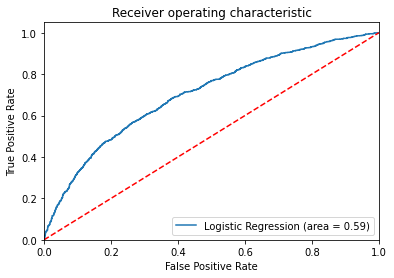

In [ ]:
# ROC curve
lr_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The ROC curve above shows that the logistic regression model is not perfect in assessing the correct positive data points. However, the best threshold that separates best the defendeants from recidivists and non-recidivists is at 0.59.

In [ ]:
# Cross validate AUC score
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
print('Cross-Validation Accuracy Scores:', cv_scores)
print(np.mean(cv_scores))

Cross-Validation Accuracy Scores: [0.69235364 0.69235364 0.69235364 0.70310633 0.70472206]
0.6969778640449447


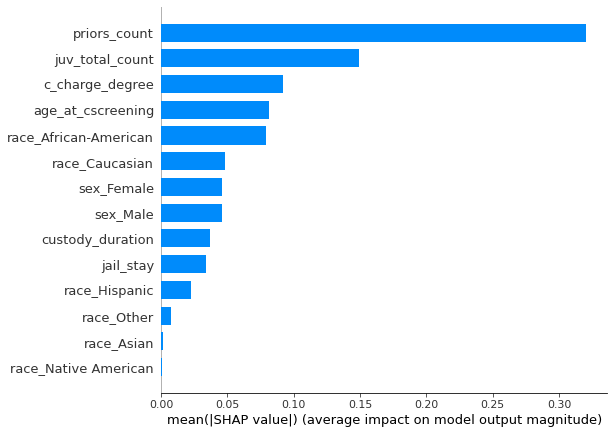

In [ ]:
# Global explanation
explainer = shap.LinearExplainer(lr, X_train)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type='bar', feature_names=X.columns)

On a global level and global importance, when it comes to the prediction with the logistic regression model of classifying defendants as recidivists or non-recidivists, the features such as count of prior charges, number of juveniles, the charge degree, the age at the time the compas screening is conducted for the defendant and whether the defendant is African American or not are features that account for a high weight into the predictions.

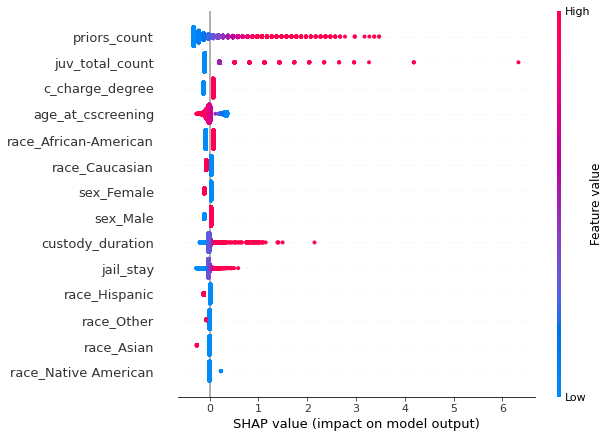

In [ ]:
#Local explanation
shap.summary_plot(shap_values, X_train, feature_names=X.columns)

The distributions of the data points are very different from feature to feature. For features like priors_count or juv_total_count it seems like the shap values are distributed unequally. We see that higher SHAP values have a higher feature value and hence have a higher interaction. 

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


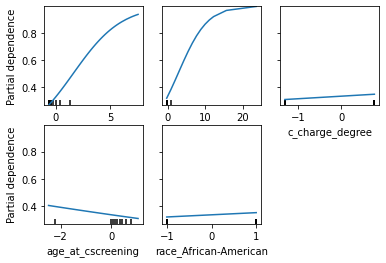

In [ ]:
plot_partial_dependence(lr, X_train, feature_names=X.columns, features = ['priors_count', 'juv_total_count', 'c_charge_degree', 'age_at_cscreening', 'race_African-American'])

The higher the priors_count, the more defendants are classified as recidivists. This is also applicable to the count of juveniles. For the charge degree, age at compas screening and race of African American, we cannot derive clear statements, since it tends to be that these defendants are rather classified as non-recidivists.

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


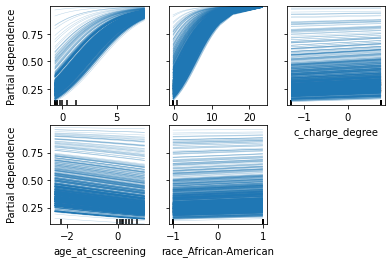

In [ ]:
plot_partial_dependence(lr, X_train, feature_names=X.columns, features = ['priors_count', 'juv_total_count', 'c_charge_degree', 'age_at_cscreening', 'race_African-American'], kind='individual')

# KNN

In [ ]:
# Import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc

In [ ]:
# Load and split dataset
X = df2.drop(columns=["two_year_recid"])
y = df2['two_year_recid'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

Again we load and split the dataset for the defendants only to be classified as recidivists (1) or non-recidivists (0) with a test size of 30%.

In [ ]:
# Create and fit k-NN classifier 
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

We started with the number of neighbours of 27 at first and then fitted the model with the training dataset in order to make the predictions with the test dataset.

In [ ]:
# Evaluate algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2073  305]
 [ 617  593]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      2378
           1       0.66      0.49      0.56      1210

    accuracy                           0.74      3588
   macro avg       0.72      0.68      0.69      3588
weighted avg       0.73      0.74      0.73      3588



The confusion matrix displays the following values:
TNR: 66%
TPR: 77%
FNR: 34%
FPR: 23%

It turns out that 74% of the test dataset were correctly identified as recidivists or non-recidivists. 

Looking at the precision value, from all the defendants correctly predicted as non-recidivists, we have predicted 77% correctly, whilst 66% of the recidivists were predicted correctly. 

Looking at the recall scores, it becomes obvious that actually 87% of the non-recidivists are non-recidivists, whilst 49% of the recidivists are recidivists.

In [ ]:
# Tuning
parameters = {"n_neighbors": range(1, 100)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'n_neighbors': 15}

The K-nearest neighbors classifier can be tuned with the hyperparameter of the number of neighbours. By setting the range between 1 and 100, with GridSearch the best number of neighbors would be 15.

In [ ]:
# Fit k-NN classifier to tuned parameter 'n_neighbors'
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

# Make its predictions
y_pred = knn.predict(X_test)

In [ ]:
# Evaluate algorithm with new 'n_neighbors'
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2053  325]
 [ 609  601]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      2378
           1       0.65      0.50      0.56      1210

    accuracy                           0.74      3588
   macro avg       0.71      0.68      0.69      3588
weighted avg       0.73      0.74      0.73      3588



When computing the confusion matrix and classification report again, the values do not differ too significantly from the ones before tuning. Our accuracy still is at 74%.

In [ ]:
# Accuracy
print("The accuracy equals to", knn.score(X_test, y_test))

The accuracy equals to 0.7396878483835005


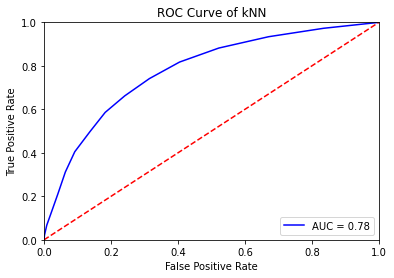

In [ ]:
# Probability estimates of the positive class
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

The area under the ROC curve equals to 78%. Our model is not perfect yet to predict 100% of the data points correctly. However, the best threshold in order to classify the defendants as recidivists or non-recidivists would be at 78%.

# Random Forrest


In [ ]:
# Import libaries

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [ ]:
# Build benchmark model

X = df2.drop(columns=["two_year_recid"])
y = df2['two_year_recid']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
# Train benchmark model 

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
##Measure model performance 

In [ ]:
#Create report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69      1186
           1       0.63      0.54      0.58       980

    accuracy                           0.65      2166
   macro avg       0.64      0.64      0.64      2166
weighted avg       0.64      0.65      0.64      2166



In [ ]:
#Calculate AUC  

y_pred_prob = clf.predict_proba(X_test)[:,1]

print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.7002318718381113


In [ ]:
#Compute cross-validated AUC

cv_auc = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')

print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.69719047 0.66561422 0.66947685 0.68617298 0.69419148]


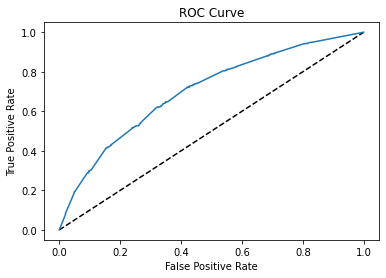

In [ ]:
#Plot ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
Plot feature importance

sns.barplot(x = feature_imp, y = feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features (MDI)")
plt.legend()
plt.show()

SyntaxError: ignored

In [ ]:
#Build new model with 3 most important features

X2 = df_final[['priors_count', 'decile_score', 'age_cat']]
y2 = df_final['two_year_recid'].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

clf2 = RandomForestClassifier(random_state=42)

In [ ]:
#Train new model

clf2.fit(X_train2, y_train2)

y_pred2 = clf2.predict(X_test2)

In [ ]:
##Measure model performance 

In [ ]:
#Create report

print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1207
           1       0.65      0.53      0.58       958

    accuracy                           0.67      2165
   macro avg       0.66      0.65      0.65      2165
weighted avg       0.66      0.67      0.66      2165



In [ ]:
# Calculate AUC  

y_pred_prob2 = clf2.predict_proba(X_test2)[:,1]

print("AUC: {}".format(roc_auc_score(y_test2, y_pred_prob2)))

AUC: 0.7152094687738366


In [ ]:
# Compute cross-validated AUC

cv_auc = cross_val_score(clf2, X2, y2, cv=5, scoring='roc_auc')

print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.71490833 0.70845863 0.69587836 0.6984767  0.70894231]


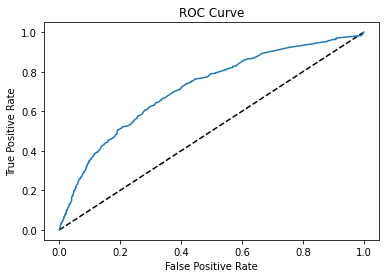

In [ ]:
#Plot ROC Curve

fpr, tpr, thresholds = roc_curve(y_test2, y_pred_prob2)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
##Increasing performance of model 2 via hyperparameter tuning

In [ ]:
#Parameters used by our current forest (Note: explain parameter selection)

print('Parameters currently in use:\n')
pprint(clf2.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
#Create the grid 
param_grid = {}

grid = GridSearchCV(estimator = clf2, param_grid=param_grid, cv = 3)

In [ ]:
#Fit the grid

#grid.fit(X_train2, y_train2)

In [ ]:
#Determine optimal hyperparameters

#grid.best_params_

# Boosting

In [ ]:
#Import libaries

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from pprint import pprint
!pip install shap
import shap
from sklearn.inspection import partial_dependence, plot_partial_dependence

In [ ]:
#Create feature and target variables
X = df2.drop(columns=["two_year_recid"])
y = df2['two_year_recid']

#Initiate classifier
xgb = XGBClassifier(random_state=42)

#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

#Fit benchmark model on training data 
xgb.fit(X_train, y_train)

#Make predictions
y_pred = xgb.predict(X_test)

### Model Performance

In [ ]:
#Validate/measure benchmark model using Accuracy with Hold-out 
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.7066974595842956


AUC score: 0.7637809541764897


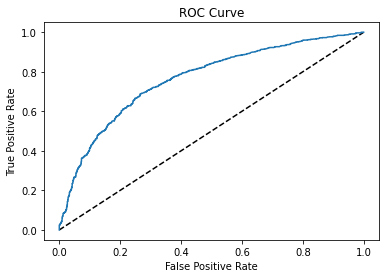

In [ ]:
#Validate/measure benchmark model using AUC with Hold-out  
y_pred_prob = xgb.predict_proba(X_test)[:,1]

print("AUC score: {}".format(roc_auc_score(y_test, y_pred_prob)))

#Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
#Validate/measure benchmark model using Accuracy with K-Fold Cross-validation  
cv_auc = cross_val_score(xgb, X, y, cv=5, scoring='accuracy')

print("Accuracy on 5-fold cross-validation: {}".format(cv_auc))
print("Avergae Accuracy on 5-fold cross-validation: {}".format(cv_auc.mean()))

Accuracy on 5-fold cross-validation: [0.71517672 0.6964657  0.68329868 0.7006237  0.69972261]
Avergae Accuracy on 5-fold cross-validation: 0.6990574806108787


In [ ]:
#Validate/measure benchmark model using AUC with K-Fold Cross-validation
cv_auc = cross_val_score(xgb, X, y, cv=5, scoring='roc_auc')

print("AUC scores on 5-fold cross-validation: {}".format(cv_auc))
print("Averge AUC score on 5-fold cross-validation: {}".format(cv_auc.mean()))

AUC scores on 5-fold cross-validation: [0.77402852 0.75563585 0.7417703  0.75395662 0.77388015]
Averge AUC score on 5-fold cross-validation: 0.7598542866452093


In [ ]:
#Hyperparameter-tuning via GridSearchCV

params = {'max_depth': [3,6,10],
          'learning_rate': [0.01, 0.05, 0.1],
          'n_estimators': [100, 500, 1000],
          'colsample_bytree': [0.3, 0.7]}

#scoring = {"AUC": "roc_auc", "Accuracy": "accuracy"}

#xgb_cv = GridSearchCV(xgb, param_grid=params, scoring="accuracy", cv=5)

#xgb_cv.fit(X, y)

#print("Tuned XGBoost Parameters: {}".format(xgb_cv.best_params_))
#print("Best score is {}".format(xgb_cv.best_score_))

### Model Interpretation

In [ ]:
#Explain model predictions using shap library:

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)

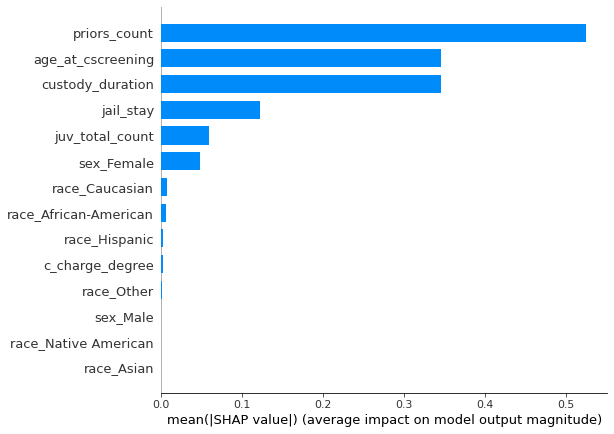

In [ ]:
#SHAP Feature Importance 

shap.summary_plot(shap_values, X_train, plot_type='bar')

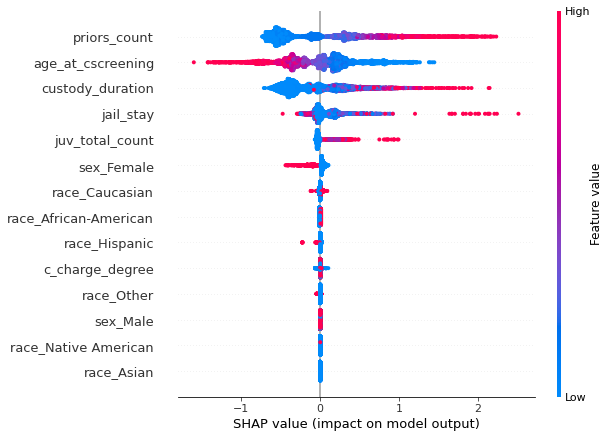

In [ ]:
#SHAP Summary Plot

shap.summary_plot(shap_values, X_train)

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


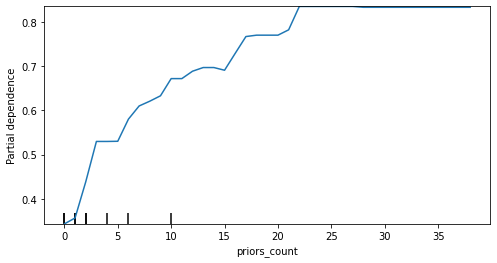

In [ ]:
#Plot PDP 

features = ["priors_count"] #"age_at_cscreening", "juv_total_count"]

fig, ax = plt.subplots(figsize=(8,4))
plot_partial_dependence(xgb, X_train, features, ax=ax)

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


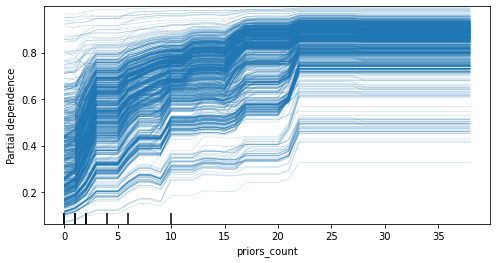

In [ ]:
#Plot ICE 

fig, ax = plt.subplots(figsize=(8,4))
plot_partial_dependence(xgb, X_train, features, ax=ax, kind="individual")

# Predicting Compas Scores

## Random Forest

Selecting columns to use

In [29]:
df_compas_forest = df
df_compas_forest = df_compas_forest.drop(columns=["id", "name", "first", "last", "compas_screening_date", "dob", "days_b_screening_arrest", "c_jail_in", "c_jail_out", "event", "is_recid", 
                         "is_violent_recid", "score_text", "screening_date", "v_type_of_assessment", "v_decile_score", "v_score_text", "v_screening_date", 
                         "priors_count.1", "decile_score.1", "two_year_recid", "start", "end", "type_of_assessment","age_cat","c_case_number","c_offense_date","c_arrest_date",
                         "c_days_from_compas","c_charge_desc","r_case_number","r_case_number","r_charge_degree","r_days_from_arrest","r_offense_date","r_charge_desc","r_jail_in",
                         "r_jail_out","violent_recid","vr_case_number","vr_charge_degree","vr_offense_date","vr_charge_desc","in_custody","out_custody"]).dropna(axis=1, how="any")


In [31]:
# import Forest Regressor and stuff
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

In [32]:
# Train Test Split
y=df_compas_forest['decile_score']
X=df_compas_forest.drop('decile_score',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [33]:
# Define variables
count_trees = np.arange(1,51,1)
max_depth = np.arange(1,21,1)
cv=5
param_grid = {
                 'n_estimators': count_trees,
                 'max_depth': max_depth,
                 'max_features': ['auto', 'sqrt', 'log2']
             }

In [ ]:
# Fit model
forest=RandomForestRegressor(min_samples_split=10)
clf = GridSearchCV(forest,param_grid,cv=cv)
clf.fit(X_train,y_train)

Fitting this model takes x minutes

In [ ]:
# best forest
clf.best_estimator_

In [ ]:
print("Train-Score: ", str(clf.score(X_train,y_train)))
print("Test-Score: ", str(clf.score(X_test,y_test)))

In [ ]:
feature_imp = pd.Series(clf.best_estimator_.feature_importances_,index = X.columns).sort_values(ascending=False)
feature_imp

In [ ]:
sns.barplot(x = feature_imp, y = feature_imp.index)